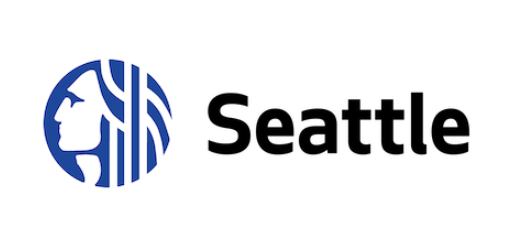

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
from shapely.geometry import Point
from datetime import datetime, date
import warnings
warnings.filterwarnings('ignore')

# Contexte
Vous travaillez pour la ville de Seattle. Pour atteindre son objectif de ville neutre en émissions de carbone en 2050, votre équipe s’intéresse de près à la consommation et aux émissions des bâtiments non destinés à l’habitation.
Des relevés minutieux ont été effectués par les agents de la ville en 2016. Voici les données et leur source. Cependant, ces relevés sont coûteux à obtenir, et à partir de ceux déjà réalisés, vous voulez tenter de prédire les émissions de CO2 et la consommation totale d’énergie de bâtiments non destinés à l’habitation pour lesquels elles n’ont pas encore été mesurées.


<br>
<br>
<br>
<br>
Le Building Energy Benchmarking and Reporting Program de Seattle (SMC 22.920) exige des propriétaires de bâtiments non résidentiels et multifamiliaux (20 000 pieds carrés ou plus) qu'ils suivent leurs performances énergétiques et présentent un rapport annuel à la ville de Seattle. Les bâtiments sont responsables de 33 % des émissions de base de Seattle. La politique d'analyse comparative soutient les objectifs de Seattle visant à réduire la consommation d'énergie et les émissions de gaz à effet de serre des bâtiments existants. En 2013, la ville de Seattle a adopté un plan d'action climatique visant à atteindre des émissions nettes de gaz à effet de serre (GES) nulles d'ici 2050. L'analyse comparative annuelle, les rapports et la divulgation de la performance des bâtiments sont des éléments fondamentaux pour créer une plus grande valeur marchande pour l'efficacité énergétique.
Conformément à l'ordonnance (125000), à partir de 2015, la ville de Seattle publiera chaque année les données relatives à tous les bâtiments de 20 000 pieds carrés et plus. Cette mise à jour du mandat d'analyse comparative a été adoptée par le conseil municipal de Seattle le 29 février 2016.


# Objectifs
Vous cherchez également à évaluer l’intérêt de l’**ENERGY STAR Score** pour la prédiction d’émissions, qui est fastidieux à calculer avec l’approche utilisée actuellement par votre équipe. Vous l'intégrerez dans la modélisation et jugerez de son intérêt.

Vous sortez tout juste d’une réunion de brief avec votre équipe. Voici un récapitulatif de votre mission :

* Réaliser une courte analyse exploratoire.
* Tester différents modèles de prédiction afin de répondre au mieux à la problématique.


Chargez le fichier `2016_Building_Energy_Benchmarking.csv` à l'aide de Pandas. Stockez le résultat du chargement dans la variable `df`.

In [2]:
df = pd.read_csv('2016_Building_Energy_Benchmarking.csv') 

Head() pour afficher les 5 premières lignes du dataframe `df`.

In [3]:
df.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,...,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,...,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,...,8.115253e+05,2768924.0,18112.13086,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,...,1.573449e+06,5368607.0,88039.98438,8803998.0,False,NaN,Compliant,NaN,505.01,2.88


la taille du dataframe avec shape

In [4]:
df.shape

(3376, 46)

min, max, moyenne, écart type, etc) pour toutes les variables quantitatives avec describes

In [5]:
df.describe()

,OSEBuildingID,DataYear,ZipCode,CouncilDistrictCode,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,...,SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),Comments,TotalGHGEmissions,GHGEmissionsIntensity
count,3376.000000,3376.0,3360.000000,3376.000000,3376.000000,3376.000000,3376.000000,3368.000000,3376.000000,3.376000e+03,...,3.371000e+03,3.370000e+03,3.367000e+03,3.367000e+03,3.367000e+03,3.367000e+03,3.367000e+03,0.0,3367.000000,3367.000000
mean,21208.991114,2016.0,98116.949107,4.439277,47.624033,-122.334795,1968.573164,1.106888,4.709123,9.483354e+04,...,5.403667e+06,5.276726e+06,2.745959e+05,1.086639e+06,3.707612e+06,1.368505e+04,1.368505e+06,NaN,119.723971,1.175916
std,12223.757015,0.0,18.615205,2.120625,0.047758,0.027203,33.088156,2.108402,5.494465,2.188376e+05,...,2.161063e+07,1.593879e+07,3.912173e+06,4.352478e+06,1.485066e+07,6.709781e+04,6.709781e+06,NaN,538.832227,1.821452
min,1.000000,2016.0,98006.000000,1.000000,47.499170,-122.414250,1900.000000,0.000000,0.000000,1.128500e+04,...,0.000000e+00,0.000000e+00,0.000000e+00,-3.382680e+04,-1.154170e+05,0.000000e+00,0.000000e+00,NaN,-0.800000,-0.020000
25%,19990.750000,2016.0,98105.000000,3.000000,47.599860,-122.350662,1948.000000,1.000000,2.000000,2.848700e+04,...,9.251286e+05,9.701822e+05,0.000000e+00,1.874229e+05,6.394870e+05,0.000000e+00,0.000000e+00,NaN,9.495000,0.210000
50%,23112.000000,2016.0,98115.000000,4.000000,47.618675,-122.332495,1975.000000,1.000000,4.000000,4.417500e+04,...,1.803753e+06,1.904452e+06,0.000000e+00,3.451299e+05,1.177583e+06,3.237538e+03,3.237540e+05,NaN,33.920000,0.610000
75%,25994.250000,2016.0,98122.000000,7.000000,47.657115,-122.319407,1997.000000,1.000000,5.000000,9.099200e+04,...,4.222455e+06,4.381429e+06,0.000000e+00,8.293178e+05,2.829632e+06,1.189033e+04,1.189034e+06,NaN,93.940000,1.370000
max,50226.000000,2016.0,98272.000000,7.000000,47.733870,-122.220966,2015.000000,111.000000,99.000000,9.320156e+06,...,8.739237e+08,4.716139e+08,1.349435e+08,1.925775e+08,6.570744e+08,2.979090e+06,2.979090e+08,NaN,16870.980000,34.090000


In [6]:
df.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'Address', 'City', 'State', 'ZipCode',
       'TaxParcelIdentificationNumber', 'CouncilDistrictCode', 'Neighborhood',
       'Latitude', 'Longitude', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'DefaultData', 'Comments', 'ComplianceStatus',
       'Outlier

In [7]:
for col in df.columns:
    print(col,df[col].nunique())

OSEBuildingID 3376
DataYear 1
BuildingType 8
PrimaryPropertyType 24
PropertyName 3362
Address 3354
City 1
State 1
ZipCode 55
TaxParcelIdentificationNumber 3268
CouncilDistrictCode 7
Neighborhood 19
Latitude 2876
Longitude 2656
YearBuilt 113
NumberofBuildings 17
NumberofFloors 50
PropertyGFATotal 3195
PropertyGFAParking 496
PropertyGFABuilding(s) 3193
ListOfAllPropertyUseTypes 466
LargestPropertyUseType 56
LargestPropertyUseTypeGFA 3122
SecondLargestPropertyUseType 50
SecondLargestPropertyUseTypeGFA 1352
ThirdLargestPropertyUseType 44
ThirdLargestPropertyUseTypeGFA 501
YearsENERGYSTARCertified 65
ENERGYSTARScore 100
SiteEUI(kBtu/sf) 1085
SiteEUIWN(kBtu/sf) 1105
SourceEUI(kBtu/sf) 1648
SourceEUIWN(kBtu/sf) 1694
SiteEnergyUse(kBtu) 3354
SiteEnergyUseWN(kBtu) 3341
SteamUse(kBtu) 131
Electricity(kWh) 3352
Electricity(kBtu) 3351
NaturalGas(therms) 2109
NaturalGas(kBtu) 2109
DefaultData 2
Comments 0
ComplianceStatus 4
Outlier 2
TotalGHGEmissions 2818
GHGEmissionsIntensity 511


In [8]:
#info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   DataYear                         3376 non-null   int64  
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   Address                          3376 non-null   object 
 6   City                             3376 non-null   object 
 7   State                            3376 non-null   object 
 8   ZipCode                          3360 non-null   float64
 9   TaxParcelIdentificationNumber    3376 non-null   object 
 10  CouncilDistrictCode              3376 non-null   int64  
 11  Neighborhood                     3376 non-null   object 
 12  Latitude            

In [9]:
#info()
df.nunique()

OSEBuildingID                      3376
DataYear                              1
BuildingType                          8
PrimaryPropertyType                  24
PropertyName                       3362
Address                            3354
City                                  1
State                                 1
ZipCode                              55
TaxParcelIdentificationNumber      3268
CouncilDistrictCode                   7
Neighborhood                         19
Latitude                           2876
Longitude                          2656
YearBuilt                           113
NumberofBuildings                    17
NumberofFloors                       50
PropertyGFATotal                   3195
PropertyGFAParking                  496
PropertyGFABuilding(s)             3193
ListOfAllPropertyUseTypes           466
LargestPropertyUseType               56
LargestPropertyUseTypeGFA          3122
SecondLargestPropertyUseType         50
SecondLargestPropertyUseTypeGFA    1352


,Total,Percent
Comments,3376,1.000000
Outlier,3344,0.990521
YearsENERGYSTARCertified,3257,0.964751
ThirdLargestPropertyUseType,2780,0.823460
ThirdLargestPropertyUseTypeGFA,2780,0.823460
SecondLargestPropertyUseType,1697,0.502666
SecondLargestPropertyUseTypeGFA,1697,0.502666
ENERGYSTARScore,843,0.249704
LargestPropertyUseTypeGFA,20,0.005924
LargestPropertyUseType,20,0.005924


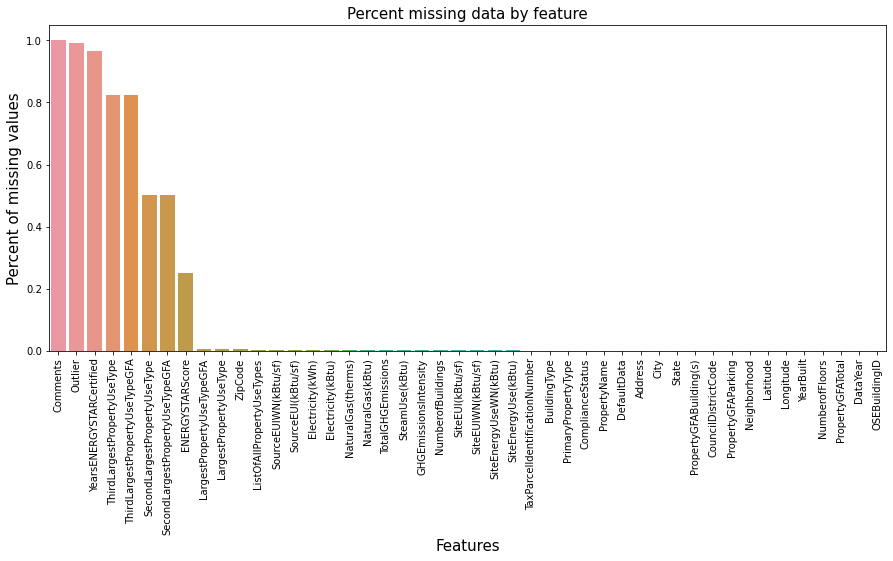

In [10]:
#les total de data pour chaque feature et le pourcentage de missing value
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
f, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation='90')
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)
missing_data

In [11]:
df.DataYear.value_counts()

2016    3376
Name: DataYear, dtype: int64

In [12]:
df.BuildingType.value_counts()

NonResidential          1460
Multifamily LR (1-4)    1018
Multifamily MR (5-9)     580
Multifamily HR (10+)     110
SPS-District K-12         98
Nonresidential COS        85
Campus                    24
Nonresidential WA          1
Name: BuildingType, dtype: int64

In [13]:
#Supression de la feature "Comments"
df.drop(['Comments'], axis=1,inplace=True)

In [14]:
df.Outlier.unique()

array([nan, 'High outlier', 'Low outlier'], dtype=object)

In [15]:
df[df['Outlier']=='High outlier']

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
226,350,2016,NonResidential,Large Office,Second And Spring Building,1100 Second Avenue,Seattle,WA,98101.0,0942000045,...,0.0,1.166315e+07,39794668.0,16048.309570,1604831.0,False,Non-Compliant,High outlier,362.66,2.10
517,704,2016,NonResidential,Large Office,401 Elliott Ave West,401 Elliot Ave West,Seattle,WA,98119.0,7666202110,...,0.0,7.953454e+06,27137187.0,0.000000,0.0,False,Non-Compliant,High outlier,189.18,1.46
1707,23174,2016,Multifamily LR (1-4),Mid-Rise Multifamily,Taylor Anne Condominium,1730 Taylor Ave N,Seattle,WA,98109.0,8567250000,...,0.0,1.961078e+06,6691197.0,1432.329956,143233.0,False,Non-Compliant,High outlier,54.25,1.77
2763,26852,2016,Multifamily LR (1-4),Low-Rise Multifamily,Atlas Building,420 Maynard Avenue South,Seattle,WA,98104.0,5247802315,...,0.0,5.148407e+05,1756636.0,51247.687500,5124769.0,False,Non-Compliant,High outlier,284.42,6.11
2863,27245,2016,Multifamily LR (1-4),Low-Rise Multifamily,St. Johns Apartments,725 E. Pike Street,Seattle,WA,98122.0,7502500061,...,0.0,2.937813e+05,1002382.0,16793.890630,1679389.0,False,Non-Compliant,High outlier,96.18,3.90
2922,27526,2016,Multifamily LR (1-4),Low-Rise Multifamily,Vali Hai,800 1st Ave N.,Seattle,WA,98112.0,5457300300,...,0.0,5.843347e+05,1993750.0,25253.650390,2525365.0,False,Non-Compliant,High outlier,148.02,3.41
3082,28735,2016,Multifamily LR (1-4),Low-Rise Multifamily,Building 4,400 NE Thornton Place,Seattle,WA,98125.0,8632880000,...,0.0,1.161543e+06,3963184.0,94960.359380,9496036.0,False,Non-Compliant,High outlier,531.96,11.38
3092,29390,2016,Multifamily MR (5-9),Mid-Rise Multifamily,Commodore Duchess Apartments,4005 15th Ave NE,Seattle,WA,98105.0,1142002395,...,8704596.0,4.597700e+05,1568735.0,696.960022,69696.0,False,Non-Compliant,High outlier,686.53,7.01
3265,49943,2016,Multifamily LR (1-4),Low-Rise Multifamily,Stewart House,80 Stewart Street,Seattle,WA,98101.0,8008550000,...,0.0,1.054889e+06,3599281.0,10035.120120,1003512.0,False,Non-Compliant,High outlier,78.39,1.60


<AxesSubplot:>

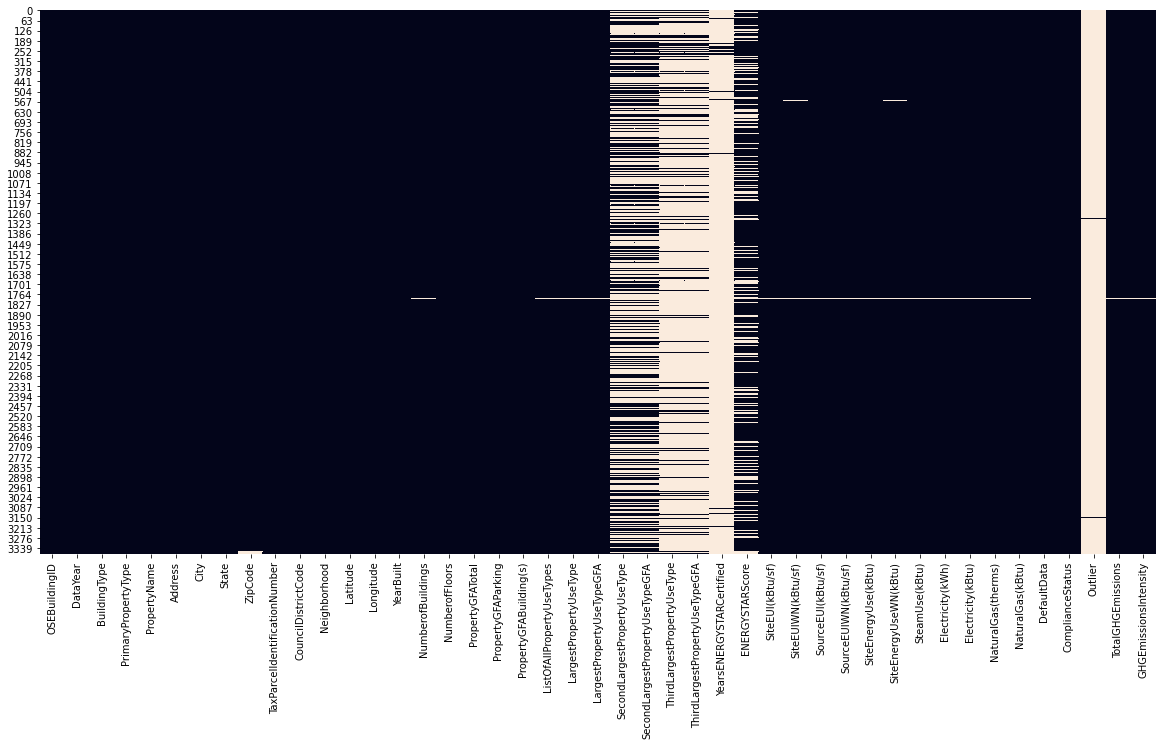

In [16]:
#sisualisation des Nan avec seaborn et le heatmap
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(), cbar=False)

In [19]:
# Create a geometry column by constructing Point objects from the lon and lat columns
df['geometry'] = df.apply(lambda row: Point(row['Longitude'], row['Latitude']), axis=1)

In [20]:
# Create a GeoDataFrame from the DataFrame
gdf = gpd.GeoDataFrame(df, geometry='geometry')

In [26]:
gdf.crs

In [27]:
gdf = gdf[gdf.is_valid == True]

<AxesSubplot:>

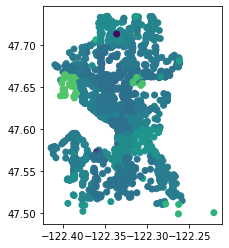

In [24]:
gdf['geometry'].centroid
gdf.plot(column = "BuildingType")

# Data Cleaning

# Feature engineering

In [ ]:
df.to_csv('Building_Energy_Benchmarking.csv', index=False, header=True)

In [ ]:
df.shape